# Problem Statement

1. Who are the customers?
2. Defining customer segments.
4. Predicting customer conversion.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df_reg = pd.read_excel('C:/Users/adils/Desktop/MACHINE LEARNING/Allianz/regional_data.xlsx')
df_fun = pd.read_excel('C:/Users/adils/Desktop/MACHINE LEARNING/Allianz/funnel_data.xlsx')
df_pol = pd.read_excel('C:/Users/adils/Desktop/MACHINE LEARNING/Allianz/policies_data.xlsx')

In [4]:
print(df_reg.shape)
print(df_fun.shape)
print(df_pol.shape)

(15539, 34)
(9373, 18)
(13365, 26)


In [5]:
df_reg.head()

,zipcode_link,zip4,PROVINCE,URB,INCOME,SOCCL_A,SOCCL_B1,SOCCL_B2,SOCCL_C,SOCCL_D,...,FAM_CHILD_Y,FAM_CHILD_O,FAM_WCHILD_Y,FAM_WCHILD_MED,FAM_WCHILD_OLD,CIT_HOUSEHOLD,LOAN,SAVINGS,SHOP_ONLINE,CAR
0,22282,1011,North Holland,1,1.0,5.0,2.0,2.0,1.0,1.0,...,3.0,2.0,1.0,2.0,3.0,3.0,4.0,4.0,5.0,2.0
1,10026,1011,North Holland,1,3.0,1.0,3.0,4.0,1.0,1.0,...,2.0,3.0,1.0,1.0,3.0,2.0,1.0,4.0,3.0,1.0
2,18907,1012,North Holland,1,1.0,4.0,2.0,2.0,2.0,1.0,...,2.0,1.0,3.0,2.0,1.0,2.0,4.0,6.0,6.0,1.0
3,18558,1012,North Holland,1,2.0,4.0,3.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,4.0,6.0,6.0,1.0
4,22808,1012,North Holland,1,2.0,2.0,3.0,3.0,2.0,1.0,...,1.0,1.0,2.0,1.0,2.0,1.0,4.0,6.0,6.0,1.0


In [6]:
df_fun.head()

,affinity_name,status_report,offer_number,policy_number,zipcode_link,zip4,birth_date,brand,date_offer,date_request,policy_start_date,premium,buildyear_car,buildmonth_car,wa,wa_bep_ca,wa_ca,updated_on
0,Insuro,Requestwithdrawn,1000,10000.0,10000,2132,1985-01-01,HYUNDAI,2018-10-11,2018-10-11,2018-11-01,686.04,2016.0,June,Y,NaN,NaN,2018-10-11
1,other,Tailoredofferwithdrawn,1001,NaN,10001,6027,1987-04-01,AUDI,2018-10-11,NaT,NaT,0.00,2015.0,June,N,N,N,2018-10-12
2,other,Incompleterequest,1002,NaN,10002,3824,1972-11-01,VOLKSWAGEN,2018-10-11,NaT,NaT,896.04,2016.0,April,NaN,NaN,Y,2018-10-11
3,other,Policycreated,1003,10002.0,10003,6921,1983-08-01,MAZDA,2018-10-11,2018-10-11,2018-10-12,419.16,2009.0,June,NaN,Y,NaN,2018-10-11
4,other,Policycreated,1004,10003.0,10004,8266,1990-04-01,VOLVO,2018-10-12,2018-10-12,2018-11-01,402.36,2003.0,January,Y,NaN,NaN,2018-10-12


In [7]:
df_pol.head()

,policy_number,policy_continuation_date,policy_start_date,policy_lastchange_date,premium_wa,premium_other,zipcode_link,zip4,place_residence,birth_date,...,brand,builddate_car,weight_car,mileage_car,power_car,fuel_car,chassis,drive,turbo,transmission
0,11948,2020-03-24,2004-03-24,2019-03-23,752.45,963.17,15583,1713,OBDAM,1977-10-01,...,SUZUKI,2019-03-01,1065.0,20,82.0,GASOLINE,SUV,FWD,YES,MANUAL
1,11949,2020-05-28,2004-05-28,2015-05-28,526.99,454.47,15584,3223,HELLEVOETSLUIS,1967-08-01,...,CITROEN,2011-12-01,805.0,20,50.0,GASOLINE,HATCHB.,FWD,NO,MANUAL
2,11950,2020-01-01,2004-01-01,2015-07-15,1000.60,1098.17,15585,3312,DORDRECHT,1954-04-01,...,HYUNDAI,2015-06-01,1168.0,15,99.0,GASOLINE,HATCHB.,FWD,NO,MANUAL
3,11951,2020-04-01,2002-04-01,2018-04-01,NaN,262.42,15586,6524,NYMEGEN,1944-10-01,...,Eriba,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11952,2020-10-01,2001-11-21,2019-10-01,561.68,64.80,15587,6215,MAASTRICHT,1950-09-01,...,SUZUKI,2001-01-01,705.0,15,NaN,GASOLINE,NaN,NaN,NaN,NaN


# Merging df_pol and df_reg

In [8]:
df_pol_reg = pd.merge(df_pol, df_reg, on = 'zipcode_link', how = 'inner')
df_pol_reg.head()

,policy_number,policy_continuation_date,policy_start_date,policy_lastchange_date,premium_wa,premium_other,zipcode_link,zip4_x,place_residence,birth_date,...,FAM_CHILD_Y,FAM_CHILD_O,FAM_WCHILD_Y,FAM_WCHILD_MED,FAM_WCHILD_OLD,CIT_HOUSEHOLD,LOAN,SAVINGS,SHOP_ONLINE,CAR
0,11948,2020-03-24,2004-03-24,2019-03-23,752.45,963.17,15583,1713,OBDAM,1977-10-01,...,2.0,2.0,2.0,1.0,3.0,3.0,3.0,4.0,3.0,2.0
1,11949,2020-05-28,2004-05-28,2015-05-28,526.99,454.47,15584,3223,HELLEVOETSLUIS,1967-08-01,...,3.0,3.0,2.0,2.0,3.0,4.0,4.0,4.0,5.0,5.0
2,11950,2020-01-01,2004-01-01,2015-07-15,1000.60,1098.17,15585,3312,DORDRECHT,1954-04-01,...,4.0,3.0,2.0,2.0,2.0,3.0,5.0,6.0,6.0,5.0
3,11951,2020-04-01,2002-04-01,2018-04-01,NaN,262.42,15586,6524,NYMEGEN,1944-10-01,...,3.0,3.0,1.0,1.0,4.0,4.0,1.0,6.0,4.0,4.0
4,15648,2020-10-01,2001-10-01,2010-10-01,1087.00,1134.07,15586,6524,NYMEGEN,1944-10-01,...,3.0,3.0,1.0,1.0,4.0,4.0,1.0,6.0,4.0,4.0


In [9]:
df_pol_reg.shape

(13342, 59)

# Merging df_reg and df_fun

In [10]:
df_fun_reg = pd.merge(df_fun, df_reg, on = 'zipcode_link', how = 'inner')
df_fun_reg.head()
print(df_fun_reg.shape)
print(df_fun_reg.columns)

(9315, 51)
Index(['affinity_name', 'status_report', 'offer_number', 'policy_number',
       'zipcode_link', 'zip4_x', 'birth_date', 'brand', 'date_offer',
       'date_request', 'policy_start_date', 'premium', 'buildyear_car',
       'buildmonth_car', 'wa', 'wa_bep_ca', 'wa_ca', 'updated_on', 'zip4_y',
       'PROVINCE', 'URB', 'INCOME', 'SOCCL_A', 'SOCCL_B1', 'SOCCL_B2',
       'SOCCL_C', 'SOCCL_D', 'EDU_HIGH', 'EDU_MID', 'EDU_LOW', 'DINK',
       'OWN_HOUSE', 'AVG_HOUSE', 'RENT_PRICE', 'STAGE_OF_LIFE', 'SINGLE',
       'FAM', 'FAM_WCHILD', 'SINGLES_YOUNG', 'SINGLES_MID', 'SINGLES_OLD',
       'FAM_CHILD_Y', 'FAM_CHILD_O', 'FAM_WCHILD_Y', 'FAM_WCHILD_MED',
       'FAM_WCHILD_OLD', 'CIT_HOUSEHOLD', 'LOAN', 'SAVINGS', 'SHOP_ONLINE',
       'CAR'],
      dtype='object')


# Dropping unncessary columns

In [11]:
df_pol_reg = df_pol_reg.drop(['policy_continuation_date','policy_start_date','policy_lastchange_date','weight_car','mileage_car',
                'power_car','drive','turbo','zip4_x','zip4_y'],axis=1)

# Finding and treating missing values 

In [12]:
df_pol_reg.isna().sum()

policy_number                     0
premium_wa                      310
premium_other                  1461
zipcode_link                      0
place_residence                   0
birth_date                        6
gender                           13
private_commercial                1
bonus_malus_percent             366
other_cover                    4534
premium_other_incl_discount    4533
worth_car                      1101
brand                             2
builddate_car                   578
fuel_car                        332
chassis                         911
transmission                   1460
PROVINCE                          0
URB                               0
INCOME                          711
SOCCL_A                          36
SOCCL_B1                         36
SOCCL_B2                         36
SOCCL_C                          36
SOCCL_D                          36
EDU_HIGH                         36
EDU_MID                          36
EDU_LOW                     

In [13]:
df_pol_reg.columns

Index(['policy_number', 'premium_wa', 'premium_other', 'zipcode_link',
       'place_residence', 'birth_date', 'gender', 'private_commercial',
       'bonus_malus_percent', 'other_cover', 'premium_other_incl_discount',
       'worth_car', 'brand', 'builddate_car', 'fuel_car', 'chassis',
       'transmission', 'PROVINCE', 'URB', 'INCOME', 'SOCCL_A', 'SOCCL_B1',
       'SOCCL_B2', 'SOCCL_C', 'SOCCL_D', 'EDU_HIGH', 'EDU_MID', 'EDU_LOW',
       'DINK', 'OWN_HOUSE', 'AVG_HOUSE', 'RENT_PRICE', 'STAGE_OF_LIFE',
       'SINGLE', 'FAM', 'FAM_WCHILD', 'SINGLES_YOUNG', 'SINGLES_MID',
       'SINGLES_OLD', 'FAM_CHILD_Y', 'FAM_CHILD_O', 'FAM_WCHILD_Y',
       'FAM_WCHILD_MED', 'FAM_WCHILD_OLD', 'CIT_HOUSEHOLD', 'LOAN', 'SAVINGS',
       'SHOP_ONLINE', 'CAR'],
      dtype='object')

In [14]:
cols_0 = ['premium_other','premium_other_incl_discount','URB',
       'INCOME', 'SOCCL_A', 'SOCCL_B1', 'SOCCL_B2', 'SOCCL_C', 'SOCCL_D',
       'EDU_HIGH', 'EDU_MID', 'EDU_LOW', 'DINK', 'OWN_HOUSE', 'AVG_HOUSE',
       'RENT_PRICE', 'STAGE_OF_LIFE', 'SINGLE', 'FAM', 'FAM_WCHILD',
       'SINGLES_YOUNG', 'SINGLES_MID', 'SINGLES_OLD', 'FAM_CHILD_Y',
       'FAM_CHILD_O', 'FAM_WCHILD_Y', 'FAM_WCHILD_MED', 'FAM_WCHILD_OLD',
       'CIT_HOUSEHOLD', 'LOAN', 'SAVINGS', 'SHOP_ONLINE', 'CAR']
df_pol_reg[cols_0] = df_pol_reg[cols_0].fillna(0)
df_pol_reg['premium_wa'].fillna(df_pol_reg['premium_wa'].mean(), inplace = True)
df_pol_reg['other_cover'].fillna('None', inplace = True)
df_pol_reg['bonus_malus_percent'].fillna(df_pol_reg['bonus_malus_percent'].mean(), inplace=True)
df_pol_reg['worth_car'].fillna(df_pol_reg['worth_car'].mean(), inplace=True)

In [15]:
df_pol_reg.dropna(inplace=True)
df_pol_reg.isna().sum()

policy_number                  0
premium_wa                     0
premium_other                  0
zipcode_link                   0
place_residence                0
birth_date                     0
gender                         0
private_commercial             0
bonus_malus_percent            0
other_cover                    0
premium_other_incl_discount    0
worth_car                      0
brand                          0
builddate_car                  0
fuel_car                       0
chassis                        0
transmission                   0
PROVINCE                       0
URB                            0
INCOME                         0
SOCCL_A                        0
SOCCL_B1                       0
SOCCL_B2                       0
SOCCL_C                        0
SOCCL_D                        0
EDU_HIGH                       0
EDU_MID                        0
EDU_LOW                        0
DINK                           0
OWN_HOUSE                      0
AVG_HOUSE 

In [16]:
df_fun_reg = df_fun_reg.drop(['zip4_x', 'zip4_y', 'date_request', 'updated_on','policy_start_date', 'buildmonth_car',
                         'date_offer','offer_number','policy_number'], axis=1)

In [17]:
df_fun_reg.isna().sum()

affinity_name        0
status_report        2
zipcode_link         0
birth_date         141
brand                3
premium            371
buildyear_car        3
wa                5752
wa_bep_ca         6285
wa_ca             5249
PROVINCE             0
URB                  0
INCOME             642
SOCCL_A             61
SOCCL_B1            61
SOCCL_B2            61
SOCCL_C             61
SOCCL_D             61
EDU_HIGH            61
EDU_MID             61
EDU_LOW             61
DINK                61
OWN_HOUSE           67
AVG_HOUSE          143
RENT_PRICE        5739
STAGE_OF_LIFE       82
SINGLE              61
FAM                 61
FAM_WCHILD          61
SINGLES_YOUNG       61
SINGLES_MID         61
SINGLES_OLD         61
FAM_CHILD_Y         61
FAM_CHILD_O         61
FAM_WCHILD_Y        61
FAM_WCHILD_MED      61
FAM_WCHILD_OLD      61
CIT_HOUSEHOLD       66
LOAN                61
SAVINGS             61
SHOP_ONLINE         61
CAR                 61
dtype: int64

In [18]:
col_0 = ['premium', 'URB','INCOME', 'SOCCL_A', 'SOCCL_B1', 'SOCCL_B2', 'SOCCL_C', 'SOCCL_D',
       'EDU_HIGH', 'EDU_MID', 'EDU_LOW', 'DINK', 'OWN_HOUSE', 'AVG_HOUSE',
       'RENT_PRICE', 'STAGE_OF_LIFE', 'SINGLE', 'FAM', 'FAM_WCHILD',
       'SINGLES_YOUNG', 'SINGLES_MID', 'SINGLES_OLD', 'FAM_CHILD_Y',
       'FAM_CHILD_O', 'FAM_WCHILD_Y', 'FAM_WCHILD_MED', 'FAM_WCHILD_OLD',
       'CIT_HOUSEHOLD', 'LOAN', 'SAVINGS', 'SHOP_ONLINE', 'CAR']
df_fun_reg[col_0] = df_fun_reg[col_0].fillna(0)
df_fun_reg['wa'].fillna('N', inplace=True)
df_fun_reg['wa_bep_ca'].fillna('N', inplace=True)
df_fun_reg['wa_ca'].fillna('N', inplace=True)
df_fun_reg.dropna(inplace=True)

In [19]:
df_fun_reg.isna().sum()

affinity_name     0
status_report     0
zipcode_link      0
birth_date        0
brand             0
premium           0
buildyear_car     0
wa                0
wa_bep_ca         0
wa_ca             0
PROVINCE          0
URB               0
INCOME            0
SOCCL_A           0
SOCCL_B1          0
SOCCL_B2          0
SOCCL_C           0
SOCCL_D           0
EDU_HIGH          0
EDU_MID           0
EDU_LOW           0
DINK              0
OWN_HOUSE         0
AVG_HOUSE         0
RENT_PRICE        0
STAGE_OF_LIFE     0
SINGLE            0
FAM               0
FAM_WCHILD        0
SINGLES_YOUNG     0
SINGLES_MID       0
SINGLES_OLD       0
FAM_CHILD_Y       0
FAM_CHILD_O       0
FAM_WCHILD_Y      0
FAM_WCHILD_MED    0
FAM_WCHILD_OLD    0
CIT_HOUSEHOLD     0
LOAN              0
SAVINGS           0
SHOP_ONLINE       0
CAR               0
dtype: int64

In [20]:
#calculating age of customers and car from the birth dates and the year cars were built.

df_pol_reg['birth_date'] = pd.to_datetime(df_pol_reg['birth_date'])
df_pol_reg['builddate_car'] = pd.to_datetime(df_pol_reg['builddate_car'])
current_date = datetime.now()
df_pol_reg['age'] = df_pol_reg['birth_date'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))
df_pol_reg['car_age'] = df_pol_reg['builddate_car'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

In [21]:
df_fun_reg['birth_date'] = pd.to_datetime(df_fun_reg['birth_date'])
df_fun_reg['buildyear_car'] = pd.to_datetime(df_fun_reg['buildyear_car'])
df_fun_reg['age'] = df_fun_reg['birth_date'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))
df_fun_reg['car_age'] = df_fun_reg['buildyear_car'].apply(lambda x: current_date.year - x.year)

# Descriptive analytics to find the characteristics of customers

In [22]:
df_pol_reg.head()

,policy_number,premium_wa,premium_other,zipcode_link,place_residence,birth_date,gender,private_commercial,bonus_malus_percent,other_cover,...,FAM_WCHILD_Y,FAM_WCHILD_MED,FAM_WCHILD_OLD,CIT_HOUSEHOLD,LOAN,SAVINGS,SHOP_ONLINE,CAR,age,car_age
0,11948,752.45,963.17,15583,OBDAM,1977-10-01,F,P,75.0,CAS,...,2.0,1.0,3.0,3.0,3.0,4.0,3.0,2.0,46,4
1,11949,526.99,454.47,15584,HELLEVOETSLUIS,1967-08-01,F,P,75.0,CAS,...,2.0,2.0,3.0,4.0,4.0,4.0,5.0,5.0,56,11
2,11950,1000.60,1098.17,15585,DORDRECHT,1954-04-01,M,P,75.0,CAS,...,2.0,2.0,2.0,3.0,5.0,6.0,6.0,5.0,69,8
6,11953,1691.67,514.71,15588,AMSTERDAM,1968-01-01,M,P,75.0,BEP,...,1.0,2.0,2.0,5.0,5.0,4.0,4.0,1.0,55,17
7,11954,790.98,973.37,15589,SCHIEDAM,1954-04-01,F,P,80.0,CAS,...,1.0,3.0,3.0,6.0,2.0,6.0,6.0,5.0,69,6


In [23]:
df_pol_reg.columns

Index(['policy_number', 'premium_wa', 'premium_other', 'zipcode_link',
       'place_residence', 'birth_date', 'gender', 'private_commercial',
       'bonus_malus_percent', 'other_cover', 'premium_other_incl_discount',
       'worth_car', 'brand', 'builddate_car', 'fuel_car', 'chassis',
       'transmission', 'PROVINCE', 'URB', 'INCOME', 'SOCCL_A', 'SOCCL_B1',
       'SOCCL_B2', 'SOCCL_C', 'SOCCL_D', 'EDU_HIGH', 'EDU_MID', 'EDU_LOW',
       'DINK', 'OWN_HOUSE', 'AVG_HOUSE', 'RENT_PRICE', 'STAGE_OF_LIFE',
       'SINGLE', 'FAM', 'FAM_WCHILD', 'SINGLES_YOUNG', 'SINGLES_MID',
       'SINGLES_OLD', 'FAM_CHILD_Y', 'FAM_CHILD_O', 'FAM_WCHILD_Y',
       'FAM_WCHILD_MED', 'FAM_WCHILD_OLD', 'CIT_HOUSEHOLD', 'LOAN', 'SAVINGS',
       'SHOP_ONLINE', 'CAR', 'age', 'car_age'],
      dtype='object')

In [24]:
df_pol_reg['total_premium'] = df_pol_reg['premium_wa'] + df_pol_reg['premium_other_incl_discount']

In [25]:
print(f'Correlation between bonus_malus_percent and total_premium {df_pol_reg["bonus_malus_percent"].corr(df_pol_reg["total_premium"])}')

Correlation between bonus_malus_percent and total_premium 0.233724287906447


In [26]:
print(f'Correlation between age and total_premium {df_pol_reg["age"].corr(df_pol_reg["total_premium"])}')

Correlation between age and total_premium 0.24426053714058285


In [27]:
print(f'Correlation between car_age and total_premium {df_pol_reg["car_age"].corr(df_pol_reg["total_premium"])}')

Correlation between car_age and total_premium -0.5339292586165939


In [28]:
df_pol_reg['age'].describe()

count    11863.000000
mean        53.245638
std         17.618434
min         23.000000
25%         36.000000
50%         54.000000
75%         68.000000
max        123.000000
Name: age, dtype: float64

In [29]:
df_pol_reg['car_age'].describe()

count    11863.000000
mean        14.238473
std          5.856705
min          4.000000
25%         10.000000
50%         13.000000
75%         18.000000
max         54.000000
Name: car_age, dtype: float64

In [30]:
other_covers = df_pol_reg['other_cover'].value_counts()
other_covers

CAS     5453
None    4061
BEP     2349
Name: other_cover, dtype: int64

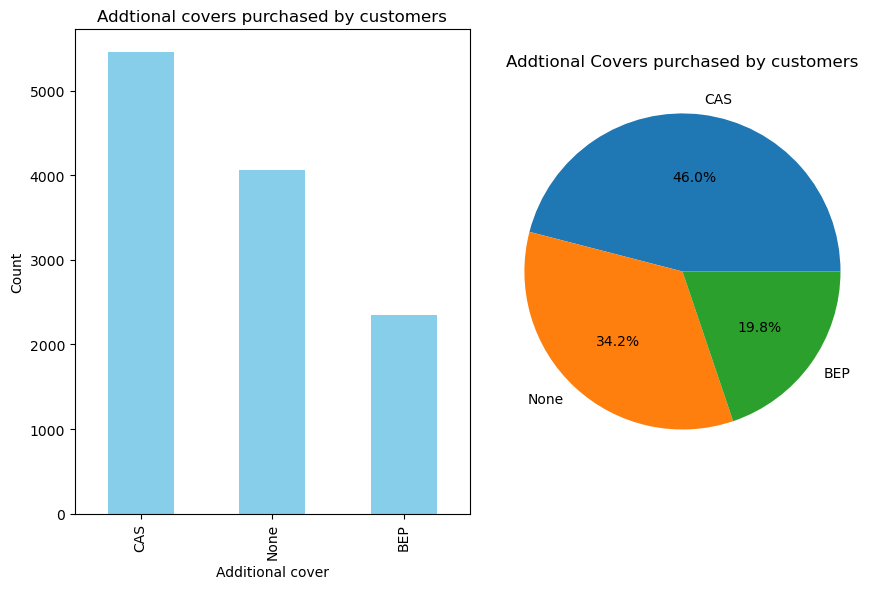

In [31]:
plt.figure(figsize=(9,6))


plt.subplot(1,2,1)
other_covers.plot(kind='bar', color='skyblue')
plt.title('Addtional covers purchased by customers')
plt.xlabel('Additional cover')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(other_covers, labels = other_covers.index ,autopct='%1.1f%%')
plt.title('Addtional Covers purchased by customers')
plt.tight_layout()

plt.show()

In [32]:
income_cas = df_pol_reg[df_pol_reg['other_cover'] == 'CAS']['INCOME'].value_counts()
income_cas

2.0    1952
3.0    1187
1.0     838
6.0     587
4.0     468
0.0     345
5.0      76
Name: INCOME, dtype: int64

In [33]:
income_none = df_pol_reg[df_pol_reg['other_cover'] == 'None']['INCOME'].value_counts()
income_none

3.0    1223
2.0    1018
4.0     907
1.0     249
6.0     248
5.0     220
0.0     196
Name: INCOME, dtype: int64

In [34]:
income_bep = df_pol_reg[df_pol_reg['other_cover'] == 'BEP']['INCOME'].value_counts()
income_bep

2.0    747
3.0    628
4.0    397
1.0    228
6.0    142
0.0    131
5.0     76
Name: INCOME, dtype: int64

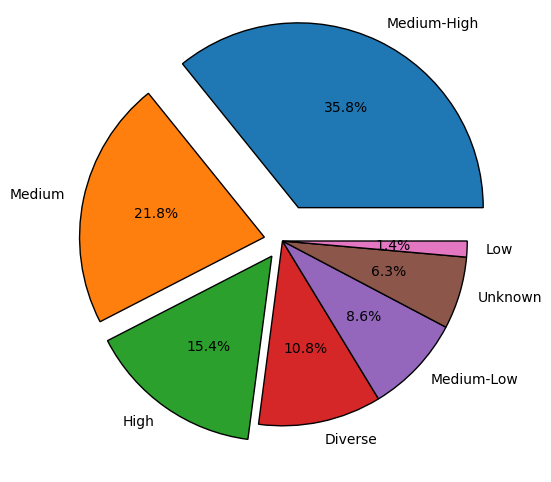

In [35]:
plt.figure(figsize=(9,6))
label = ['Medium-High','Medium','High','Diverse','Medium-Low','Unknown','Low']
explode = [0.2,0.1,0.1,0,0,0,0]
plt.pie(income_cas, labels=label, autopct='%1.1f%%',explode=explode, wedgeprops={'linewidth':1, 'edgecolor':'black'})
plt.show()

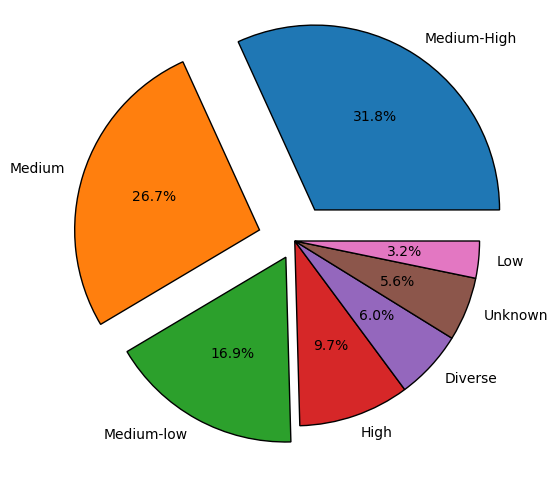

In [36]:
plt.figure(figsize=(9,6))
label_1 = ['Medium-High','Medium','Medium-low','High','Diverse','Unknown','Low']
explode = [0.2,0.2,0.1,0,0,0,0]
plt.pie(income_bep, labels=label_1, autopct='%1.1f%%',explode=explode, wedgeprops={'linewidth':1, 'edgecolor':'black'})
plt.show()

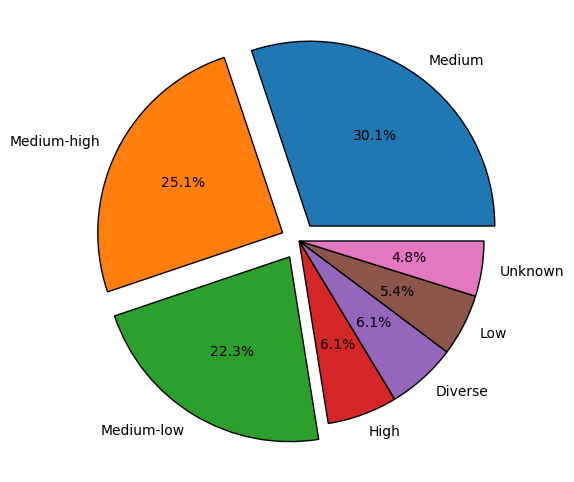

In [37]:
plt.figure(figsize=(9,6))
label_2 = ['Medium','Medium-high','Medium-low','High','Diverse','Low','Unknown']
explode = [0.1,0.1,0.1,0,0,0,0]
plt.pie(income_none, labels=label_2, autopct='%1.1f%%',explode=explode, wedgeprops={'linewidth':1, 'edgecolor':'black'})
plt.show()

In [38]:
urb_premium = df_pol_reg.groupby('URB')['total_premium'].mean()
urb_premium

URB
1    1416.410631
2    1332.826739
3    1358.465803
4    1368.055122
5    1304.883683
6    1331.294693
7    1276.641828
Name: total_premium, dtype: float64

In [39]:
urb = df_pol_reg['URB'].value_counts()
urb

4    2628
1    1887
2    1840
3    1806
5    1401
7    1340
6     961
Name: URB, dtype: int64

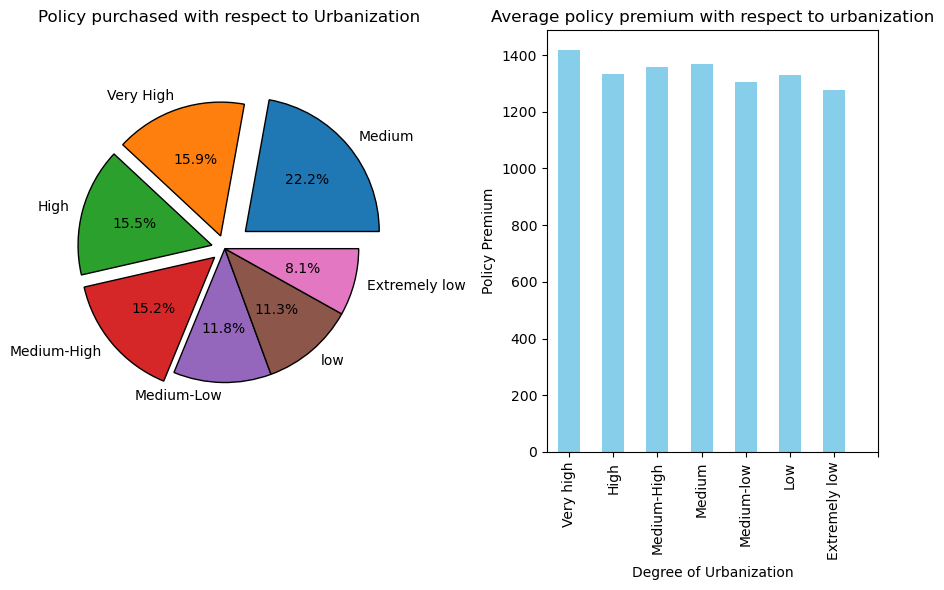

In [40]:
plt.figure(figsize=(9,6))

plt.subplot(1,2,1)
label_urb = ['Medium','Very High','High','Medium-High','Medium-Low','low', 'Extremely low']
explode = [0.2,0.1,0.1,0.1,0,0,0]
plt.pie(urb, labels=label_urb, autopct='%1.1f%%',explode=explode, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.axis('equal')
plt.title('Policy purchased with respect to Urbanization')

plt.subplot(1,2,2)
xlabel =['Very high','High','Medium-High','Medium','Medium-low','Low','Extremely low','']
xtick = [0,1,2,3,4,5,6,7]
urb_premium.plot(kind='bar', color='skyblue', legend= False)
plt.title('Average policy premium with respect to urbanization')
plt.xticks(ticks=xtick, labels=xlabel)
plt.xlabel('Degree of Urbanization')
plt.ylabel('Policy Premium')
plt.tight_layout()
plt.show()

In [41]:
sol = df_pol_reg['STAGE_OF_LIFE'].value_counts()
sol

9.0    3341
4.0    2479
6.0    2101
3.0    1435
2.0    1046
1.0     954
8.0     291
7.0     155
0.0      61
Name: STAGE_OF_LIFE, dtype: int64

In [42]:
sol_premium = df_pol_reg.groupby('STAGE_OF_LIFE')['total_premium'].mean().sort_values(ascending=False)
sol_premium

STAGE_OF_LIFE
9.0    1477.919874
0.0    1420.070984
6.0    1416.543051
4.0    1329.944744
8.0    1265.583746
3.0    1229.632014
2.0    1209.145593
7.0    1174.446387
1.0    1168.727002
Name: total_premium, dtype: float64

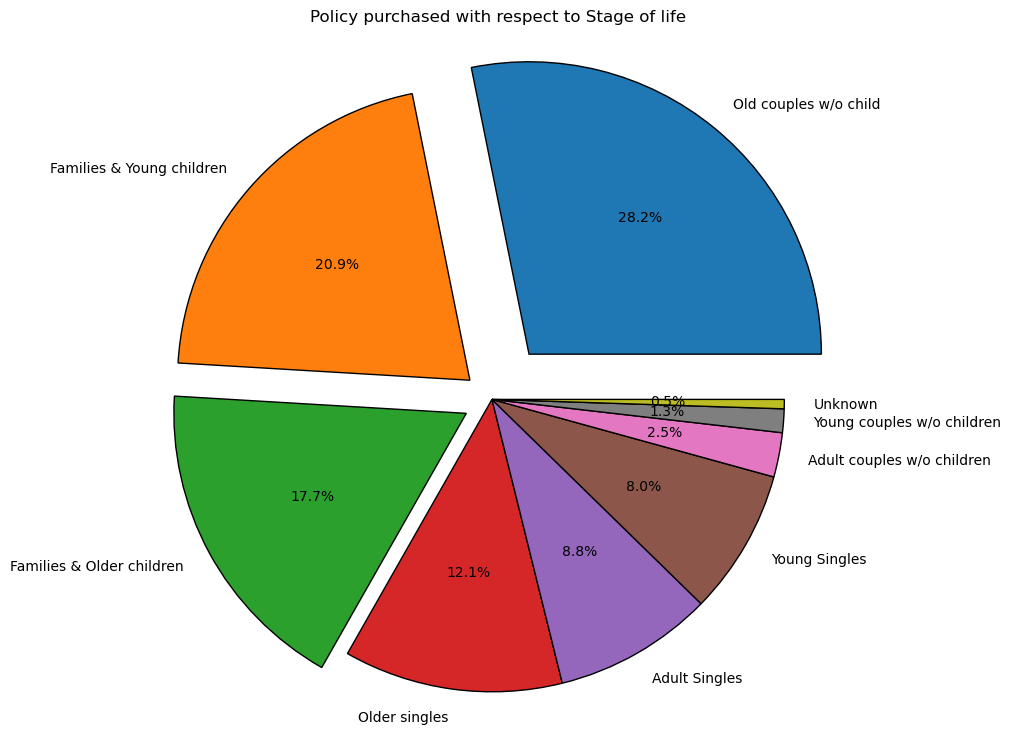

In [43]:
plt.figure(figsize=(12,9))

label_sol = ['Old couples w/o child','Families & Young children','Families & Older children','Older singles',
             'Adult Singles','Young Singles', 'Adult couples w/o children','Young couples w/o children','Unknown']
explode = [0.2,0.1,0.1,0,0,0,0,0,0]
plt.pie(sol, labels=label_sol, autopct='%1.1f%%',explode=explode, wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
        textprops={'fontsize':10})
plt.axis('equal')
plt.title('Policy purchased with respect to Stage of life')
plt.show()

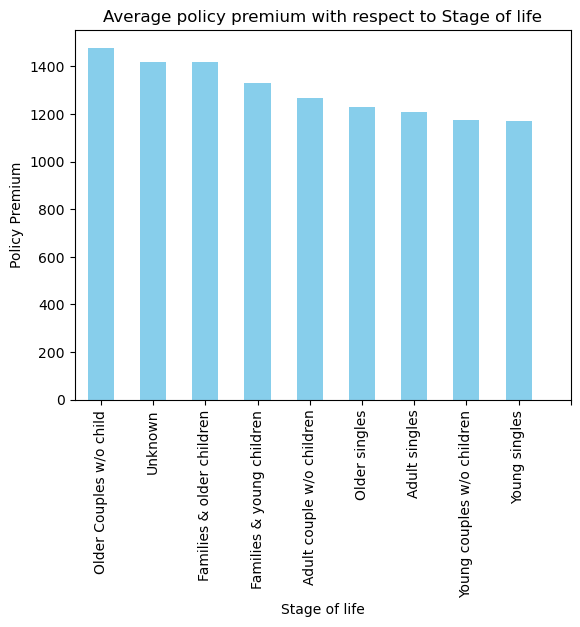

In [44]:
xlabel =['Older Couples w/o child','Unknown','Families & older children','Families & young children',
         'Adult couple w/o children','Older singles','Adult singles','Young couples w/o children','Young singles','']
xtick = [0,1,2,3,4,5,6,7,8,9]
sol_premium.plot(kind='bar', color='skyblue', legend= False)
plt.title('Average policy premium with respect to Stage of life')
plt.xticks(ticks=xtick, labels=xlabel)
plt.xlabel('Stage of life')
plt.ylabel('Policy Premium')
plt.show()

In [45]:
adult_young_income = df_pol_reg[(df_pol_reg['STAGE_OF_LIFE'] == 1)|(df_pol_reg['STAGE_OF_LIFE'] == 2)|(df_pol_reg['STAGE_OF_LIFE'] == 7)]['INCOME'].value_counts()
adult_young_income

3.0    663
4.0    566
2.0    473
0.0    174
5.0    122
1.0    105
6.0     52
Name: INCOME, dtype: int64

In [46]:
fam_old_income = df_pol_reg[(df_pol_reg['STAGE_OF_LIFE'] == 9)|(df_pol_reg['STAGE_OF_LIFE'] == 6)|
                          (df_pol_reg['STAGE_OF_LIFE'] == 4)|(df_pol_reg['STAGE_OF_LIFE'] == 3)]['INCOME'].value_counts()
fam_old_income

2.0    3115
3.0    2278
1.0    1191
4.0    1182
6.0     911
0.0     432
5.0     247
Name: INCOME, dtype: int64

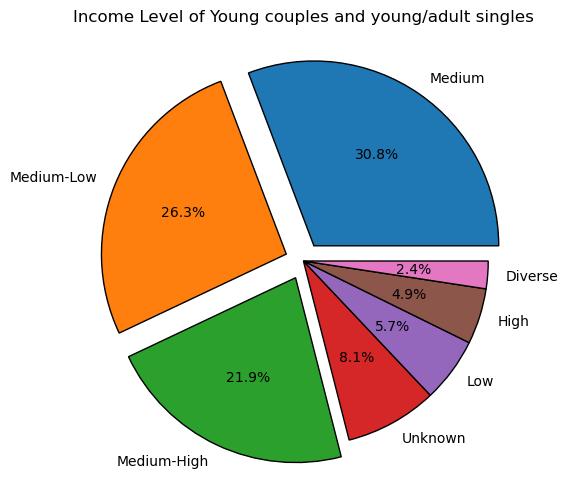

In [47]:
plt.figure(figsize=(9,6))

explode = [0.1,0.1,0.1,0,0,0,0]
label = ['Medium','Medium-Low','Medium-High','Unknown','Low','High','Diverse']
plt.pie(adult_young_income, labels=label, autopct='%1.1f%%', explode=explode,
        wedgeprops={'linewidth':1, 'edgecolor':'black'})
plt.title('Income Level of Young couples and young/adult singles')
plt.show()

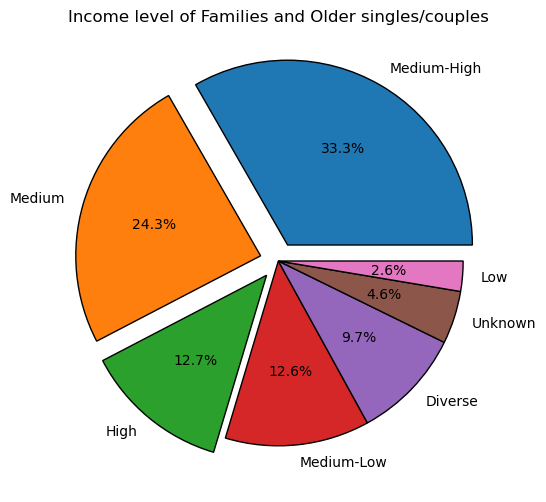

In [48]:
plt.figure(figsize=(9,6))

explode = [0.1,0.1,0.1,0,0,0,0]
label = ['Medium-High','Medium','High','Medium-Low','Diverse','Unknown','Low']
plt.pie(fam_old_income, labels=label, autopct='%1.1f%%', explode=explode,
        wedgeprops={'linewidth':1, 'edgecolor':'black'})
plt.title('Income level of Families and Older singles/couples')

plt.show()

# Customer Segmentation

In [49]:
df_pol_reg.columns

Index(['policy_number', 'premium_wa', 'premium_other', 'zipcode_link',
       'place_residence', 'birth_date', 'gender', 'private_commercial',
       'bonus_malus_percent', 'other_cover', 'premium_other_incl_discount',
       'worth_car', 'brand', 'builddate_car', 'fuel_car', 'chassis',
       'transmission', 'PROVINCE', 'URB', 'INCOME', 'SOCCL_A', 'SOCCL_B1',
       'SOCCL_B2', 'SOCCL_C', 'SOCCL_D', 'EDU_HIGH', 'EDU_MID', 'EDU_LOW',
       'DINK', 'OWN_HOUSE', 'AVG_HOUSE', 'RENT_PRICE', 'STAGE_OF_LIFE',
       'SINGLE', 'FAM', 'FAM_WCHILD', 'SINGLES_YOUNG', 'SINGLES_MID',
       'SINGLES_OLD', 'FAM_CHILD_Y', 'FAM_CHILD_O', 'FAM_WCHILD_Y',
       'FAM_WCHILD_MED', 'FAM_WCHILD_OLD', 'CIT_HOUSEHOLD', 'LOAN', 'SAVINGS',
       'SHOP_ONLINE', 'CAR', 'age', 'car_age', 'total_premium'],
      dtype='object')

In [50]:
df_kmeans = df_pol_reg[['total_premium','car_age','age','STAGE_OF_LIFE','INCOME','brand','bonus_malus_percent','worth_car']]
df_kmeans.head()

,total_premium,car_age,age,STAGE_OF_LIFE,INCOME,brand,bonus_malus_percent,worth_car
0,1704.72,4,46,1.0,4.0,SUZUKI,75.0,26143.0
1,922.53,11,56,4.0,2.0,CITROEN,75.0,10003.0
2,2057.10,8,69,4.0,2.0,HYUNDAI,75.0,23090.0
6,2169.87,17,55,4.0,5.0,FORD,75.0,27133.0
7,1764.35,6,69,6.0,1.0,RENAULT,80.0,22370.0


In [51]:
df_kmeans_num = df_kmeans[['total_premium','car_age','age','worth_car']]
df_kmeans_cat = df_kmeans[['STAGE_OF_LIFE','INCOME','brand']]

In [52]:
scaler = StandardScaler()

kmeans_num_std = scaler.fit_transform(df_kmeans_num)
df_kmeans_num_std = pd.DataFrame(data=kmeans_num_std, index=df_kmeans_num.index, columns=df_kmeans_num.columns)

In [53]:
df_kmeans_std = pd.concat([df_kmeans_num_std,df_kmeans_cat],axis=1)
df_kmeans_std

,total_premium,car_age,age,worth_car,STAGE_OF_LIFE,INCOME,brand
0,0.548893,-1.748236,-0.411271,0.430020,1.0,4.0,SUZUKI
1,-0.654878,-0.552975,0.156341,-0.998360,4.0,2.0,CITROEN
2,1.091197,-1.065230,0.894235,0.159831,4.0,2.0,HYUNDAI
6,1.264747,0.471535,0.099580,0.517635,4.0,5.0,FORD
7,0.640662,-1.406733,0.894235,0.096112,6.0,1.0,RENAULT
...,...,...,...,...,...,...,...
13337,-1.298093,0.983790,1.064519,-0.022500,3.0,4.0,FORD
13338,-0.945452,0.130032,0.496907,-0.847380,3.0,5.0,CITROEN
13339,-1.101089,0.642287,-0.808598,-0.022500,1.0,2.0,PEUGEOT
13340,-0.983542,1.666797,-1.603254,-0.022500,4.0,4.0,SUZUKI


In [54]:
df_kmeans_std = pd.get_dummies(df_kmeans_std, columns=['STAGE_OF_LIFE','INCOME','brand'])
df_kmeans_std.shape

(11863, 70)

In [55]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++')
    kmeans.fit(df_kmeans_std)
    wcss.append(kmeans.inertia_)

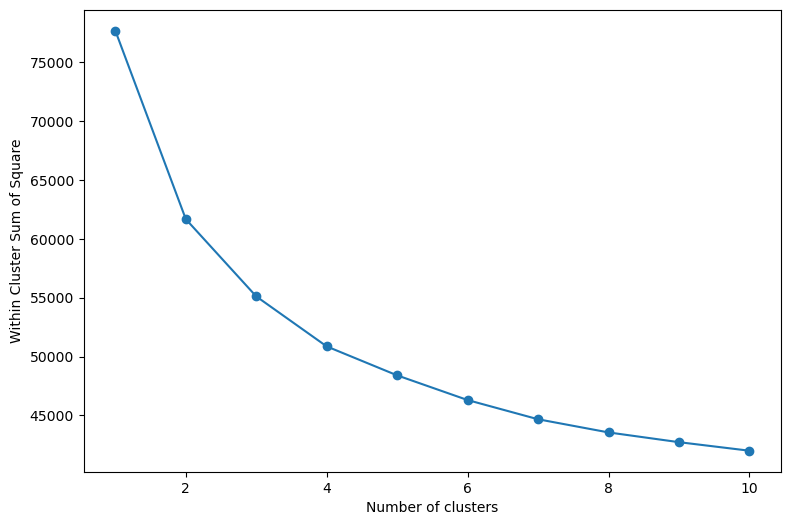

In [56]:
plt.figure(figsize=(9,6))
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.show()

In [57]:
kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
labels = kmeans.fit_predict(df_kmeans_std)
print(labels)

[1 0 1 ... 0 0 0]


In [58]:
print(f'Silhouette Score = {silhouette_score(df_kmeans_std, labels)}')

Silhouette Score = 0.19187856507966866


In [59]:
clusters = pd.DataFrame(labels, dtype=int)
clusters.columns = ['cluster']
print(clusters.shape)
clusters.head()

(11863, 1)


,cluster
0,1
1,0
2,1
3,1
4,1


In [60]:
df_cluster = pd.concat([df_kmeans.reset_index(drop=True), clusters.reset_index(drop=True)], axis=1)
df_cluster.head()

,total_premium,car_age,age,STAGE_OF_LIFE,INCOME,brand,bonus_malus_percent,worth_car,cluster
0,1704.72,4,46,1.0,4.0,SUZUKI,75.0,26143.0,1
1,922.53,11,56,4.0,2.0,CITROEN,75.0,10003.0,0
2,2057.10,8,69,4.0,2.0,HYUNDAI,75.0,23090.0,1
3,2169.87,17,55,4.0,5.0,FORD,75.0,27133.0,1
4,1764.35,6,69,6.0,1.0,RENAULT,80.0,22370.0,1


In [61]:
df_cluster_mean = df_cluster[['total_premium','car_age','age','bonus_malus_percent','worth_car','cluster']]

In [62]:
df_cluster_mode = df_cluster[['STAGE_OF_LIFE','INCOME','brand','cluster']]

In [63]:
df_cluster_mean_analysis = df_cluster_mean.groupby(['cluster']).mean()
df_cluster_mean_analysis

,total_premium,car_age,age,bonus_malus_percent,worth_car
cluster,,,,,
0,968.063778,16.847632,47.324914,66.714876,16472.928544
1,1952.747451,10.086501,62.667322,72.619724,28939.843269


In [64]:
df_cluster_mode_analysis = df_cluster_mode.groupby(['cluster'])
df_cluster_mode_analysis

In [65]:
modes = df_cluster_mode_analysis.apply(lambda x: x.mode().iloc[0])
print(modes)

0        STAGE_OF_LIFE  INCOME       brand  cluster
cluster                                            
0                  4.0     3.0  VOLKSWAGEN        0
1                  9.0     2.0  VOLKSWAGEN        1


In [66]:
df_cluster_mode = pd.DataFrame(modes).reset_index(drop=True)
df_cluster_mode

,STAGE_OF_LIFE,INCOME,brand,cluster
0,4.0,3.0,VOLKSWAGEN,0
1,9.0,2.0,VOLKSWAGEN,1


In [67]:
df_cluster_analysis = pd.merge(df_cluster_mean_analysis,df_cluster_mode, on='cluster', how='inner')
df_cluster_analysis

,cluster,total_premium,car_age,age,bonus_malus_percent,worth_car,STAGE_OF_LIFE,INCOME,brand
0,0,968.063778,16.847632,47.324914,66.714876,16472.928544,4.0,3.0,VOLKSWAGEN
1,1,1952.747451,10.086501,62.667322,72.619724,28939.843269,9.0,2.0,VOLKSWAGEN


In [68]:
df_cluster_analysis['N Obs'] = df_cluster[['cluster','worth_car']].groupby(['cluster']).count()
df_cluster_analysis['Prop Obs'] = df_cluster_analysis['N Obs'] / df_cluster_analysis['N Obs'].sum()*100
df_cluster_analysis

,cluster,total_premium,car_age,age,bonus_malus_percent,worth_car,STAGE_OF_LIFE,INCOME,brand,N Obs,Prop Obs
0,0,968.063778,16.847632,47.324914,66.714876,16472.928544,4.0,3.0,VOLKSWAGEN,7285,61.409424
1,1,1952.747451,10.086501,62.667322,72.619724,28939.843269,9.0,2.0,VOLKSWAGEN,4578,38.590576


In [69]:
df_cluster['labels'] = df_cluster['cluster'].map({
    0:'Cluster 1',
    1:'Cluster 2'
})
df_cluster.head()

,total_premium,car_age,age,STAGE_OF_LIFE,INCOME,brand,bonus_malus_percent,worth_car,cluster,labels
0,1704.72,4,46,1.0,4.0,SUZUKI,75.0,26143.0,1,Cluster 2
1,922.53,11,56,4.0,2.0,CITROEN,75.0,10003.0,0,Cluster 1
2,2057.10,8,69,4.0,2.0,HYUNDAI,75.0,23090.0,1,Cluster 2
3,2169.87,17,55,4.0,5.0,FORD,75.0,27133.0,1,Cluster 2
4,1764.35,6,69,6.0,1.0,RENAULT,80.0,22370.0,1,Cluster 2


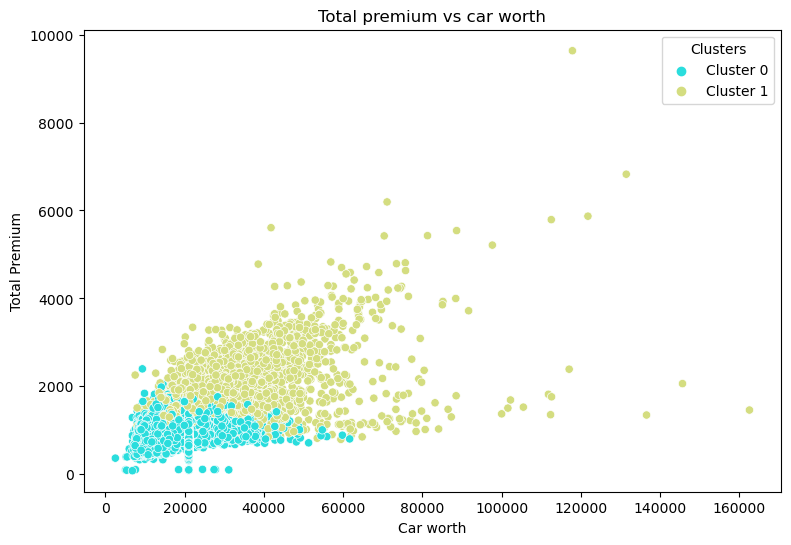

In [70]:
x_axis = df_cluster['worth_car']
y_axis = df_cluster['total_premium']

plt.figure(figsize=(9, 6))
scatter = sns.scatterplot(data=df_cluster, x=x_axis, y=y_axis, hue=kmeans.labels_, palette='rainbow')

# Create a legend
handles, labels = scatter.get_legend_handles_labels()
cluster_labels = [f'Cluster {label}' for label in set(kmeans.labels_)]
legend = plt.legend(handles, cluster_labels, title="Clusters")

plt.title('Total premium vs car worth')
plt.xlabel('Car worth')
plt.ylabel('Total Premium')
plt.show()

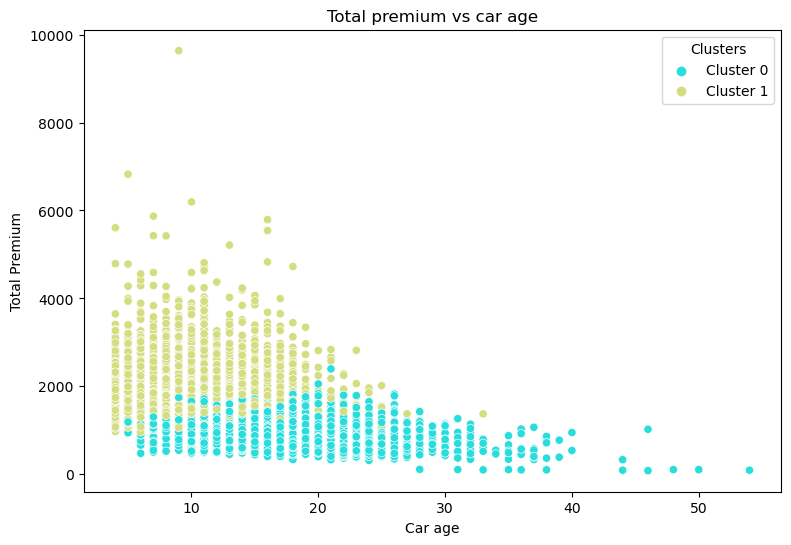

In [71]:
x_axis = df_cluster['car_age']
y_axis = df_cluster['total_premium']

plt.figure(figsize=(9, 6))
scatter = sns.scatterplot(data=df_cluster, x=x_axis, y=y_axis, hue=kmeans.labels_, palette='rainbow')

# Create a legend
handles, labels = scatter.get_legend_handles_labels()
cluster_labels = [f'Cluster {label}' for label in set(kmeans.labels_)]
legend = plt.legend(handles, cluster_labels, title="Clusters")

plt.title('Total premium vs car age')
plt.xlabel('Car age')
plt.ylabel('Total Premium')
plt.show()

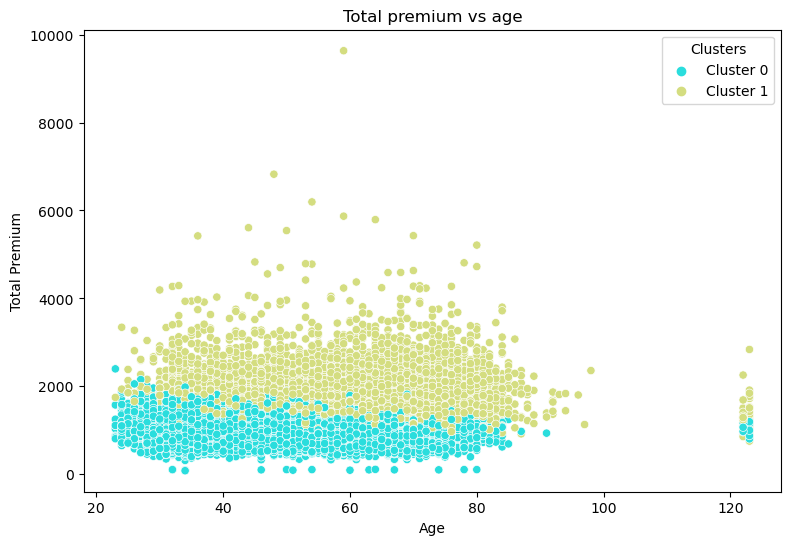

In [72]:
x_axis = df_cluster['age']
y_axis = df_cluster['total_premium']

plt.figure(figsize=(9, 6))
scatter = sns.scatterplot(data=df_cluster, x=x_axis, y=y_axis, hue=kmeans.labels_, palette='rainbow')

# Create a legend
handles, labels = scatter.get_legend_handles_labels()
cluster_labels = [f'Cluster {label}' for label in set(kmeans.labels_)]
legend = plt.legend(handles, cluster_labels, title="Clusters")

plt.title('Total premium vs age')
plt.xlabel('Age')
plt.ylabel('Total Premium')
plt.show()

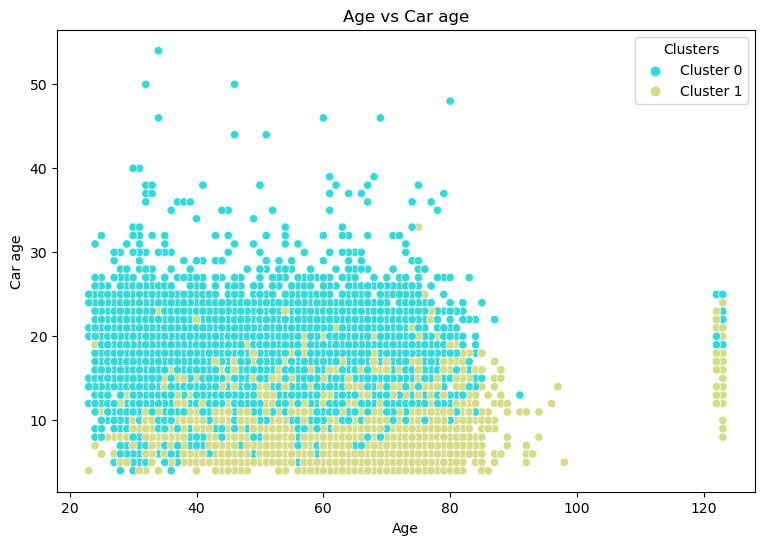

In [73]:
x_axis = df_cluster['age']
y_axis = df_cluster['car_age']

plt.figure(figsize=(9, 6))
scatter = sns.scatterplot(data=df_cluster, x=x_axis, y=y_axis, hue=kmeans.labels_, palette='rainbow')

# Create a legend
handles, labels = scatter.get_legend_handles_labels()
cluster_labels = [f'Cluster {label}' for label in set(kmeans.labels_)]
legend = plt.legend(handles, cluster_labels, title="Clusters")

plt.title('Age vs Car age')
plt.xlabel('Age')
plt.ylabel('Car age')
plt.show()

# Predicting customer conversion

In [74]:
df_fun_reg.head()

,affinity_name,status_report,zipcode_link,birth_date,brand,premium,buildyear_car,wa,wa_bep_ca,wa_ca,...,FAM_WCHILD_Y,FAM_WCHILD_MED,FAM_WCHILD_OLD,CIT_HOUSEHOLD,LOAN,SAVINGS,SHOP_ONLINE,CAR,age,car_age
0,Insuro,Requestwithdrawn,10000,1985-01-01,HYUNDAI,686.04,1970-01-01 00:00:00.000002016,Y,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,53
1,Seguros International Ltd.,Calculatenewpremium,10000,1985-01-01,SUZUKI,105.84,1970-01-01 00:00:00.000002010,Y,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,53
2,Seguros International Ltd.,Calculatenewpremium,10000,1991-01-01,VOLVO,350.52,1970-01-01 00:00:00.000002016,Y,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,53
3,other,Tailoredofferwithdrawn,10001,1987-04-01,AUDI,0.00,1970-01-01 00:00:00.000002015,N,N,N,...,1.0,1.0,4.0,5.0,2.0,6.0,5.0,5.0,36,53
4,other,Incompleterequest,10002,1972-11-01,VOLKSWAGEN,896.04,1970-01-01 00:00:00.000002016,N,N,Y,...,1.0,2.0,2.0,6.0,3.0,5.0,6.0,5.0,50,53


In [75]:
df_fun_reg.columns

Index(['affinity_name', 'status_report', 'zipcode_link', 'birth_date', 'brand',
       'premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca', 'PROVINCE',
       'URB', 'INCOME', 'SOCCL_A', 'SOCCL_B1', 'SOCCL_B2', 'SOCCL_C',
       'SOCCL_D', 'EDU_HIGH', 'EDU_MID', 'EDU_LOW', 'DINK', 'OWN_HOUSE',
       'AVG_HOUSE', 'RENT_PRICE', 'STAGE_OF_LIFE', 'SINGLE', 'FAM',
       'FAM_WCHILD', 'SINGLES_YOUNG', 'SINGLES_MID', 'SINGLES_OLD',
       'FAM_CHILD_Y', 'FAM_CHILD_O', 'FAM_WCHILD_Y', 'FAM_WCHILD_MED',
       'FAM_WCHILD_OLD', 'CIT_HOUSEHOLD', 'LOAN', 'SAVINGS', 'SHOP_ONLINE',
       'CAR', 'age', 'car_age'],
      dtype='object')

In [76]:
df_fun_reg = df_fun_reg[['affinity_name','status_report','brand','premium','wa','wa_bep_ca','wa_ca','URB','INCOME',
                         'STAGE_OF_LIFE','SHOP_ONLINE','age','car_age']]

In [77]:
df_fun_reg['status_report'].value_counts()

Calculatenewpremium         2775
Incompleterequest           2669
Policycreated               1692
Personaloffer                687
Waitresponsebackoffice       386
Tailoredofferrequested       199
Tailoredofferrejected        189
Waitforapproval              167
Requestaccepted              127
Requestrejected              102
Tailoredofferwithdrawn        88
Requestwithdrawn              76
Personalofferrejected         11
Adaptedproposalwithdrawn       1
Name: status_report, dtype: int64

In [78]:
df_fun_reg.groupby('affinity_name')['premium'].mean()

affinity_name
Insuro                        496.933840
Seguros International Ltd.    430.252833
T&B                           535.576549
other                         611.099336
Name: premium, dtype: float64

In [79]:
condition1 = df_fun_reg['status_report'] == 'Calculatenewpremium'
condition2 = df_fun_reg['status_report'] == 'Policycreated'
df_fun_reg['churn'] = np.where(condition1 | condition2,1,0)

In [80]:
df_fun_reg.drop(['affinity_name','status_report'],axis=1,inplace=True)

In [81]:
df_fun_reg.head()

,brand,premium,wa,wa_bep_ca,wa_ca,URB,INCOME,STAGE_OF_LIFE,SHOP_ONLINE,age,car_age,churn
0,HYUNDAI,686.04,Y,N,N,3,0.0,0.0,0.0,38,53,0
1,SUZUKI,105.84,Y,N,N,3,0.0,0.0,0.0,38,53,1
2,VOLVO,350.52,Y,N,N,3,0.0,0.0,0.0,32,53,1
3,AUDI,0.00,N,N,N,7,2.0,9.0,5.0,36,53,0
4,VOLKSWAGEN,896.04,N,N,Y,2,2.0,4.0,6.0,50,53,0


In [82]:
cat_cols = ['brand','wa','wa_bep_ca','wa_ca','URB','INCOME','STAGE_OF_LIFE']

In [83]:
label_encoder = LabelEncoder()

for column in cat_cols:
    df_fun_reg[column] = label_encoder.fit_transform(df_fun_reg[column])

In [84]:
X = df_fun_reg.drop(['churn'], axis=1)
y = df_fun_reg['churn']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [86]:
model = LogisticRegression()

In [87]:
model.fit(X_train,y_train)

LogisticRegression()

In [88]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 ... 0 0 1]


In [89]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5736095965103599

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.58      0.58       945
           1       0.56      0.56      0.56       889

    accuracy                           0.57      1834
   macro avg       0.57      0.57      0.57      1834
weighted avg       0.57      0.57      0.57      1834



In [91]:
model_1 = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.676548
         Iterations 4


In [92]:
print(model_1.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 7335
Model:                          Logit   Df Residuals:                     7324
Method:                           MLE   Df Model:                           10
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:                 0.02353
Time:                        15:20:31   Log-Likelihood:                -4962.5
converged:                       True   LL-Null:                       -5082.1
Covariance Type:            nonrobust   LLR p-value:                 1.036e-45
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
brand             0.0006      0.001      0.457      0.648      -0.002       0.003
premium          -0.0003   7.75e-05     -3.435      0.001      -0.000      -0.000
wa               -0.6575      0.101     

In [93]:
y_pred = model.predict(X_test)

In [94]:
y_pred_binary = (y_pred >= 0.5).astype(int)

In [95]:
print(accuracy_score(y_test,y_pred_binary))

0.5736095965103599
